### Copyright 2021 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Sorting an array using heapsort and visualize the single steps

In [1]:
def heapsort(a):
    global steps, separation_graph_data
    steps=[]
    separation_graph_data=[]

    # nothing yet sorted
    steps.append([[UNSORTED]*ARRAY_SIZE, [], [], a[:]])
    separation_graph_data.append([0,ARRAY_SIZE-1])

    build_max_heap(a)
    for i in range(len(a)-1, 0, -1):
        a[0], a[i] = a[i], a[0]
        if output_assigned_elements:
            steps.append([[], [], [0,i], a[:]])
        max_heapify(a, i, 0)

        if i > 1:
            separation_graph_data.append([len(steps),i-1])
            steps.append([[PART_SORTED]*i+[SORTED]*(ARRAY_SIZE-i), [], [], a[:]])
        else: # completely sorted
            separation_graph_data.append([len(steps),-1])
            steps.append([[SORTED]*(ARRAY_SIZE), [], [], a[:]])
    return a

In [2]:
def build_max_heap(a):
    for i in range(len(a)//2, 0, -1):
        max_heapify(a, len(a), i-1)

In [3]:
def max_heapify(a, heapsize, i):
    global steps
    left_child = 2*i + 1
    right_child = 2*i + 2
    if left_child < heapsize and a[left_child] > a[i]:
        maximum = left_child
    else:
        maximum = i
    if left_child < heapsize and output_compared_elements:
        steps.append([[], [i,left_child], [], a[:]])
    if right_child < heapsize and a[right_child] > a[maximum]:
        maximum = right_child
    if right_child < heapsize and output_compared_elements:
        steps.append([[], [i,right_child], [], a[:]])
    if maximum != i:
        a[i], a[maximum] = a[maximum], a[i]
        if output_assigned_elements:
            steps.append([[], [], [i,maximum], a[:]])
        max_heapify(a, heapsize, maximum)

## Constants

In [4]:
# change output colors here
COL_SORTED = 'mediumseagreen'
COL_PART_SORTED = 'yellowgreen'
COL_UNSORTED = 'tomato'
COL_COMPARISON = 'skyblue'
COL_ASSIGNMENT = 'sandybrown'
COL_SEP_GRAPH = 'bo-' # includes also style
COL_HORIZ_LINES = 'lightgray'
COL_BOLD_HORIZ_LINE = 'k'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# Some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"

## Helper functions

In [5]:
def plot_values(x, y_vals, a):
    for y in y_vals:
        plt.text(x, y, a[y], verticalalignment='center_baseline', horizontalalignment='center', fontsize=14)

def plot_states(x, states, a):
    # colors
    for y in range(ARRAY_SIZE):
        plt.plot([x,x],[y-OFFSET, y+OFFSET], COLORS[states[y]][0], linewidth=8, solid_capstyle="butt")
    # values
    plot_values(x, range(ARRAY_SIZE), a)

def plot_elements(x, y_vals, col, a):
    minimum = min(y_vals)
    maximum = max(y_vals)
    # elements
    plot_interval(x, [minimum, minimum], col)
    plot_interval(x, [maximum, maximum], col)
    # line between both elements
    if maximum-minimum > 1:
        plot_interval(x, [minimum+1, maximum-1], col, thick_lines = False)
    # values
    plot_values(x, [minimum,maximum], a)

def plot_interval(x, y_vals, col, thick_lines = True):
    if thick_lines:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col, linewidth=8, solid_capstyle="butt")
    else:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col)

## Output graphical view

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view(ARRAY_SIZE):
    global steps

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//10)), fontsize=14)
    plt.yticks(range(0, ARRAY_SIZE, max(1,ARRAY_SIZE//10)), fontsize=14)
    plt.axis([-1, len(steps),-1, ARRAY_SIZE])
    #plt.axis('off')
    plt.xlabel("Sorting steps")
    plt.ylabel("Indexes of array to be sorted")

    # output graph based on collected data
    for i, step in enumerate(steps):
        if len(step[0]) > 0:
            plot_states(i, step[0], step[3])
        elif output_compared_elements and len(step[1]) > 0:
            plot_elements(i, step[1], COL_COMPARISON, step[3])
        elif output_assigned_elements and len(step[2]) > 0:
            plot_elements(i, step[2], COL_ASSIGNMENT, step[3])

    if plot_separation_graph:
        for i in range(len(separation_graph_data)-1):
            plt.plot([separation_graph_data[i][0], separation_graph_data[i+1][0]],
                     [separation_graph_data[i][1]+OFFSET, separation_graph_data[i+1][1]+OFFSET], COL_SEP_GRAPH)

    # draw horitontal lines
    for i in range(ARRAY_SIZE+1):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
    # draw lines to indicate the different levels of the heap
    line=0
    offset=1
    while(line<=ARRAY_SIZE):
        plt.hlines(xmin=-1, xmax=len(steps), y=line-OFFSET, color=COL_BOLD_HORIZ_LINE)
        line += offset
        offset *= 2
   
    # show plot
    plt.show()

## Global variables for easier information exchange between algorithm and output functions

In [7]:
# steps contains the data for visualization of the single steps
# steps: [[states], [compared elements], [exchanged elements], [array]]
# [states] state for each position is one of [sorted, partially sorted, unsorted]
# [compared elements]: two indexes in a list
# [exchanged elements]: key exchanges in a list
# [array]: copy of array in current state
steps = []
# states for each position in array, indexes must fit to ordering in COLORS
UNSORTED = 2
PART_SORTED = 1
SORTED = 0

# separation_graph_data contains the values for line showing sorted, partially sorted and unsorted parts
separation_graph_data=[]

## Configuration data for elements in output 

In [8]:
# change output settings here
plot_separation_graph = False
plot_separation_graph = True
output_compared_elements = False
output_compared_elements = True
output_assigned_elements = False
output_assigned_elements = True

## Size of predefined tests

In [9]:
# The size of elements in tests can be changed here
ARRAY_SIZE = 10

## Legend for output

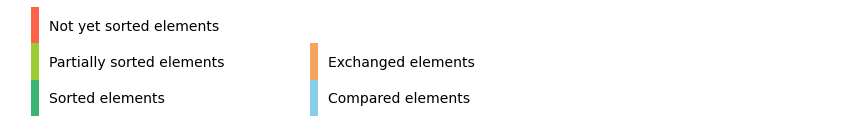

In [10]:
COLORS = [[COL_SORTED,"Sorted elements"], [COL_PART_SORTED,"Partially sorted elements"], [COL_UNSORTED,"Not yet sorted elements"],
          [COL_COMPARISON,"Compared elements"], [COL_ASSIGNMENT,"Exchanged elements"]]
plt.figure(figsize=(15, 2))
plt.axis([0, 30, 0, 3])
plt.axis('off')
for i in range(3):
    plot_interval(1, [i+OFFSET,i+OFFSET], COLORS[i][0])
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
for i in range(2):
    plot_interval(11, [i+OFFSET,i+OFFSET], COLORS[i+3][0])
    plt.text(11+OFFSET, i+OFFSET, COLORS[i+3][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
plt.show()

## Generate test data and test algorithm

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


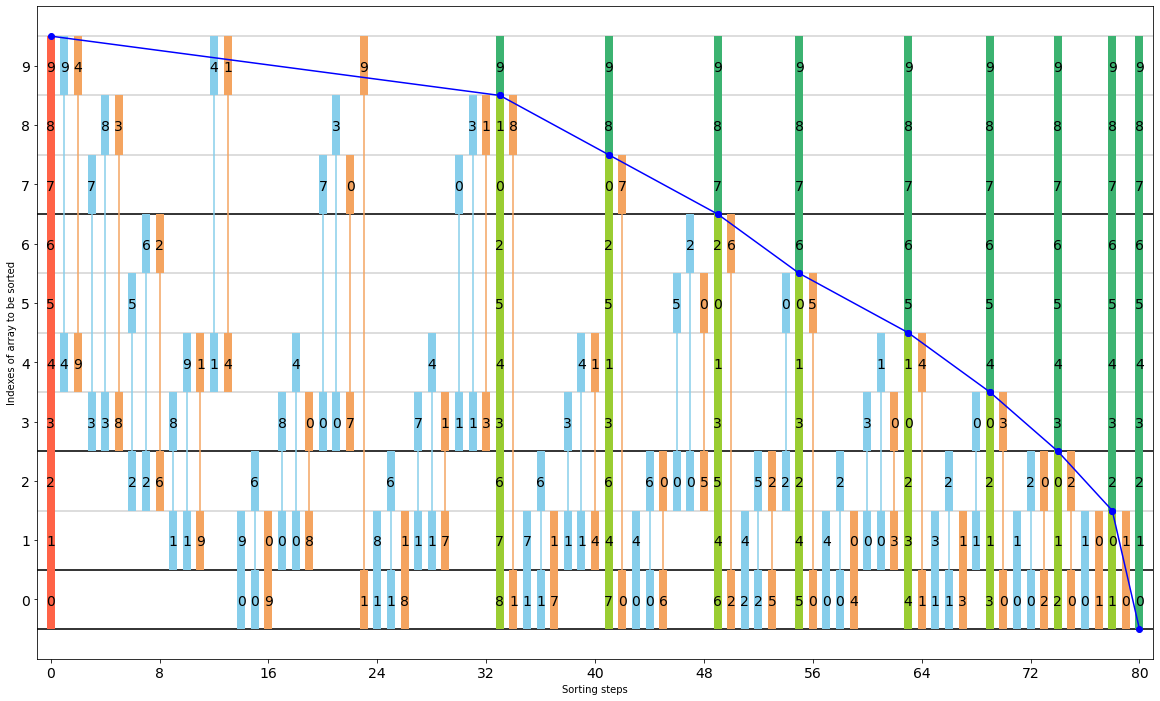

In [11]:
# test sorting sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, heapsort(sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


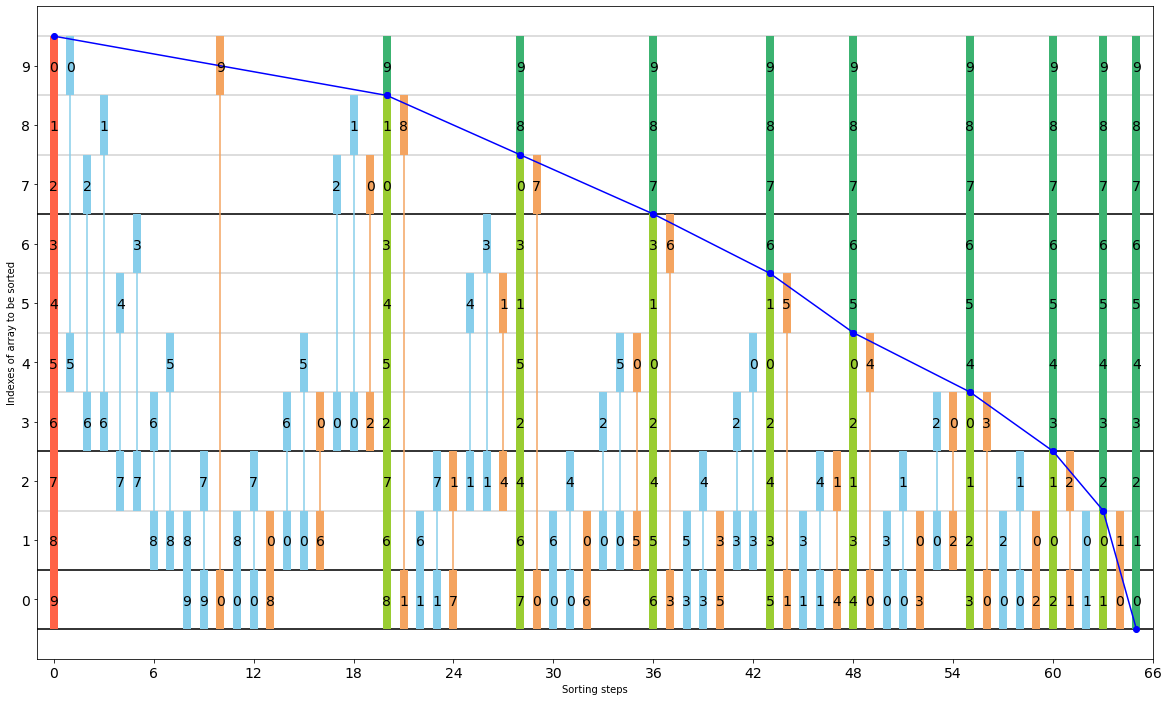

In [12]:
# test sorting reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, heapsort(reverse_sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


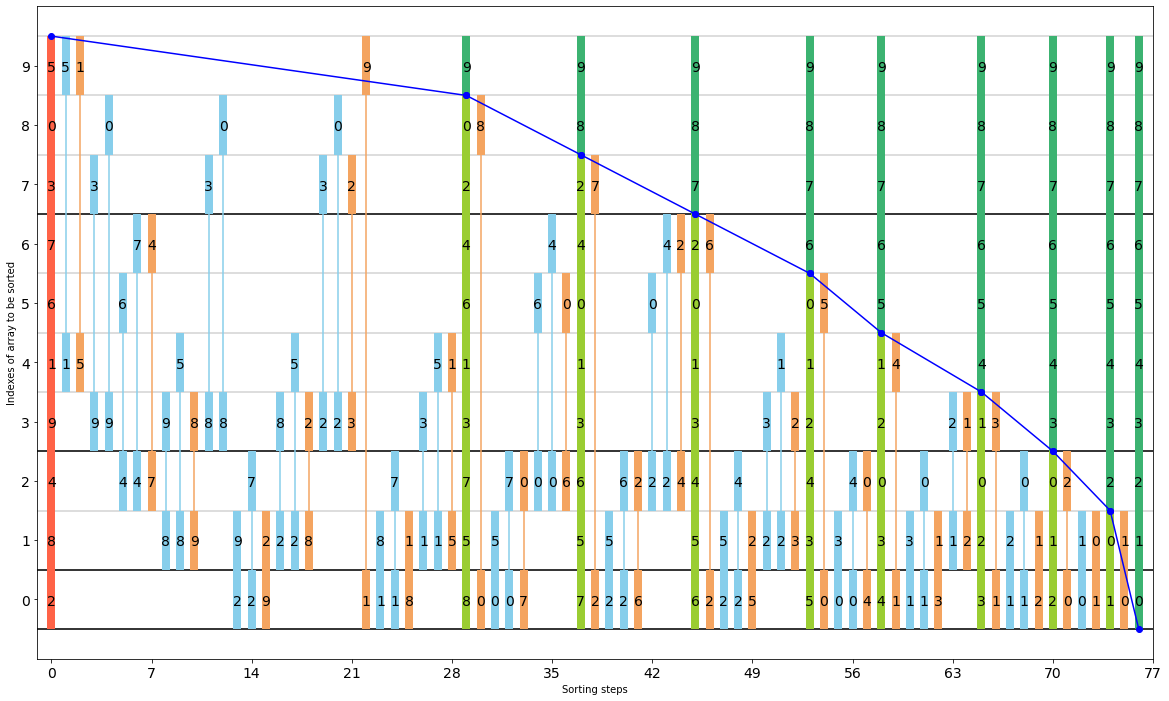

In [13]:
# test sorting random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, heapsort(array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [4, 1, 3, 2, 0]
After  sorting: [0, 1, 2, 3, 4]


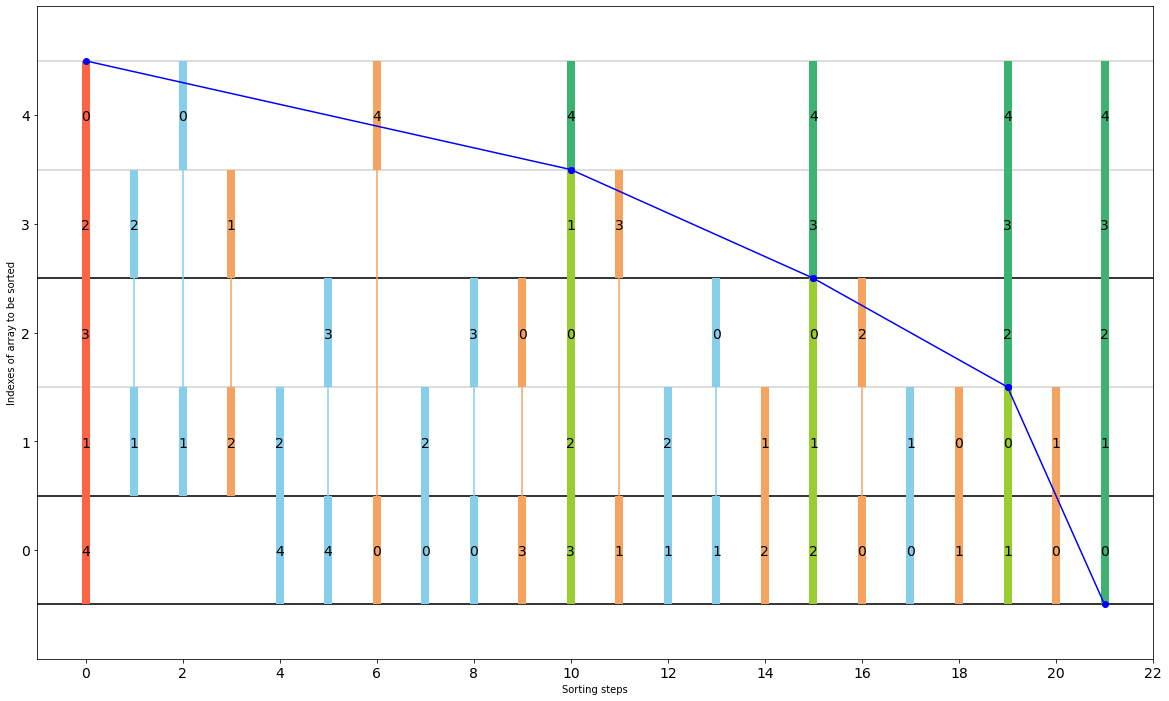

In [14]:
# your test here ...
array = [4,1,3,2,0]
ARRAY_SIZE = len(array)
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, heapsort(array))
output_graphical_view(ARRAY_SIZE)

In [15]:
# ... and here ...